## 1. Preparation

In [1]:
# import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Load datasets 
Countries = pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/home-advantage-in-sports/main/data/Country.csv")

# 2. Basketball
### 2.1. Loading Dataset

In [2]:
NBA = pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/home-advantage-in-sports/main/data/NBA.csv", encoding = "ISO-8859-1") 
NBA.head()

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976


Above data set has list of all games in the nba, that has ever been played. It summarises home and away performance of 1216 NBA teams during the years 1968-2010. 

*   HomePCT = Home Wins / (Home Wins + Home Loss)
*   AwayPCT = Away Wins / (Away Wins + Away Loss)
*   TotalPCT = Wins / (Wins + Loss)

### 2.2. Analysis

A scatter plot of the **away winning percentage** vs **the home winning percentage** is produced.

Text(0.5, 1.0, 'Home vs Away PCT in the NBA')

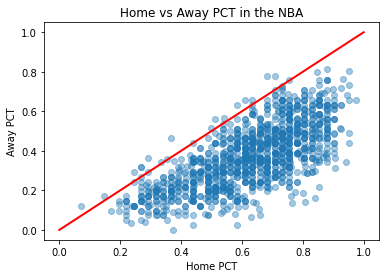

In [3]:
plt.plot (NBA.HomePCT, NBA.AwayPCT, 'o' , alpha = 0.4)
plt.plot([0,1],[0,1],linewidth=2,color="red")
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away PCT in the NBA')

As can be seen in the graph above, the home teams have much higher winning percentage. It is possible to say that NBA teams have significant advantage at home. In the past 50 years, only 16 away teams have won more games than at home. And actually these points are not really teams, this is like 16 teams for that specific year.

For the second analysis, let's define a variable called "home factor" as following: (Home PCT - Away PCT)/(Home PCT + Away PCT). This value would range from -1 to 1, where 1 implies maximal home advantage, and the opposite for -1.

(1950.0, 2010.0)

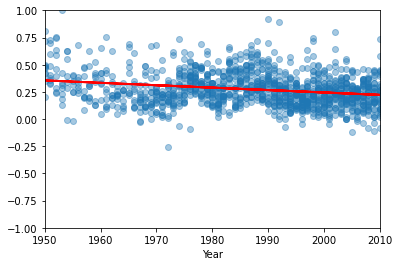

In [4]:
NBA['Home_Factor'] = np.true_divide((NBA.HomePCT - NBA.AwayPCT),(NBA.HomePCT + NBA.AwayPCT))

plt.plot(NBA.Year,NBA.Home_Factor,'o', alpha = 0.4)
x = NBA.Year
y = NBA.Home_Factor
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x), linewidth=2,color="red")
plt.xlabel('Year')
plt.ylim([-1,1])
plt.xlim([1950,2010])

It seems like there's a modest decline in home advantage in the last decades.

# 3.Soccer
### 3.1. Loading Dataset

In [5]:
Soccer = pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/home-advantage-in-sports/main/data/Soccer.csv", encoding = "ISO-8859-1")
Soccer.head()

,Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,HomeRatio,AwayWins,AwayDraw,AwayLoss,AwayGoalsDiff,Unnamed: 15
0,Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,11,0,6,11,-20,NaN
1,Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,-8,0,5,12,-19,NaN
2,Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,13,0,6,9,-19,NaN
3,Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,14,0,1,13,-23,NaN
4,Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,0,5,10,-23,NaN


Above dataset summarises home and away performance of 8365 soccer teams from a few dozens of countries during the years 2010-2016. 

As you can see this dataset doesn't have percentages. They should be calculated as below;



In [6]:
# Percentage of Home and Away wins 
Soccer['HomePCT'] = np.true_divide(Soccer['HomeWins'],Soccer['HomeWins'] + Soccer['HomeLoss'] + Soccer['HomeDraw'])
Soccer['AwayPCT'] = np.true_divide(Soccer['AwayWins'],Soccer['AwayWins'] + Soccer['AwayLoss'] + Soccer['AwayDraw'])

### 3.2. Analysis
A scatter plot of the **away winning percentage** vs **the home winning percentage** is produced.

Text(0.5, 1.0, 'Home vs Away PCT in Soccer Leagues')

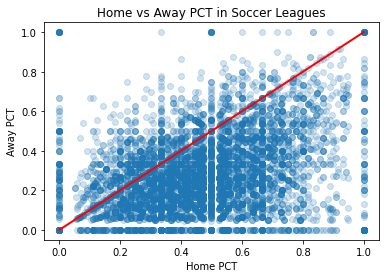

In [7]:
plt.plot(Soccer.HomePCT ,Soccer.AwayPCT,'o', alpha = 0.2)
plt.plot([0,1],[0,1],linewidth=2,color="red")
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away PCT in Soccer Leagues')

Although the distribution in the football data is not very clear, it is possible to talk about the advantage of the home teams. So let's see how goal differences change between home and away.

Text(0, 0.5, 'Away Goals Difference')

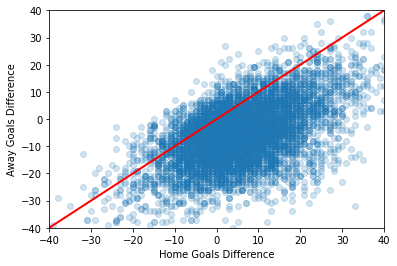

In [8]:
plt.plot(Soccer.HomeRatio,Soccer.AwayGoalsDiff,'o', alpha = 0.2)
plt.plot([-100,80],[-100,80], linewidth=2,color="red")
plt.xlim([-40,40])
plt.ylim([-40,40])
plt.xlabel('Home Goals Difference')
plt.ylabel('Away Goals Difference')

Above graph makes sense because goals are correlated with team winning.